# IMPORTING LIBRARIES


In [ ]:
! pip install kaggle

In [ ]:
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.7 MB/s eta 0:00:00


In [ ]:
! pip install cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 11.7 MB/s eta 0:00:00


In [ ]:
! pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 4.7 MB/s eta 0:00:00


In [ ]:
# Libraries
from google.colab import files
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ElasticNet
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor
import joblib

In [ ]:
%matplotlib inline

# IMPORTING DATASET FROM KAGGLE USING API

In [ ]:
!mkdir ~/.kaggle

In [ ]:
files.upload() #Api key from Kaggle personal account

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"cruzifire2001","key":"7165dec62de723c4f3b7fe7492fafeaf"}'}

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!mkdir "/content/data/"

In [ ]:
%cd "/content/data/"

/content/data


In [ ]:
!kaggle datasets download -d farazrahman/earthquake # Downloading dataset

Dataset URL: https://www.kaggle.com/datasets/farazrahman/earthquake
License(s): CC0-1.0
  0% 0.00/492k [00:00<?, ?B/s]
100% 492k/492k [00:00<00:00, 31.3MB/s]


In [ ]:
!unzip "/content/data/earthquake.zip" # Extracting the zip file

Archive:  /content/data/earthquake.zip
  inflating: all_month.csv           


In [ ]:
!rm "/content/data/earthquake.zip" # removing zip file after extraction

# GETTING TO KNOW ABOUT THE DATASET

In [ ]:
df=pd.read_csv("/content/data/all_month.csv")

# Exploratory Data Analysis

In [ ]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2024-12-04T02:04:46.498Z,61.670000,-149.460900,33.90,2.50,ml,NaN,NaN,NaN,0.4600,...,2024-12-04T02:17:21.040Z,"5 km NNW of Tanaina, Alaska",earthquake,NaN,0.200,NaN,NaN,automatic,ak,ak
1,2024-12-04T02:02:39.770Z,36.186000,-118.053833,1.80,0.87,ml,21.0,60.00,0.17490,0.1900,...,2024-12-04T02:20:38.216Z,"12 km SSW of Olancha, CA",earthquake,0.23,0.990,0.162,9.0,automatic,ci,ci
2,2024-12-04T01:56:57.937Z,18.341800,80.445100,10.00,5.00,mb,63.0,52.00,9.88600,0.7900,...,2024-12-04T02:35:12.642Z,"55 km ENE of Mulugu, India",earthquake,10.44,1.894,0.064,77.0,reviewed,us,us
3,2024-12-04T01:33:21.645Z,37.026000,-116.385500,8.10,0.00,ml,8.0,78.92,0.03100,0.0635,...,2024-12-04T01:35:27.328Z,"35 km ENE of Beatty, Nevada",earthquake,NaN,1.000,0.580,6.0,automatic,nn,nn
4,2024-12-04T01:26:23.220Z,35.922667,-117.676000,3.18,1.13,ml,28.0,46.00,0.03265,0.1300,...,2024-12-04T01:29:50.875Z,"21 km E of Little Lake, CA",earthquake,0.14,0.340,0.138,18.0,automatic,ci,ci


In [ ]:
df.shape

(8017, 22)

In [ ]:
df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8017 entries, 0 to 8016
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8017 non-null   object 
 1   latitude         8017 non-null   float64
 2   longitude        8017 non-null   float64
 3   depth            8017 non-null   float64
 4   mag              8015 non-null   float64
 5   magType          8015 non-null   object 
 6   nst              6902 non-null   float64
 7   gap              6902 non-null   float64
 8   dmin             6892 non-null   float64
 9   rms              8015 non-null   float64
 10  net              8017 non-null   object 
 11  id               8017 non-null   object 
 12  updated          8017 non-null   object 
 13  place            8017 non-null   object 
 14  type             8017 non-null   object 
 15  horizontalError  6297 non-null   float64
 16  depthError       8015 non-null   float64
 17  magError      

In [ ]:
print(df['net'].unique())
print(df['locationSource'].unique())
print(df['magSource'].unique())

['ak' 'ci' 'us' 'nn' 'hv' 'nc' 'pr' 'tx' 'uu' 'uw' 'mb' 'se' 'av' 'ok'
 'nm']
['ak' 'ci' 'us' 'nn' 'hv' 'nc' 'pr' 'tx' 'uu' 'uw' 'mb' 'se' 'av' 'ok'
 'nm']
['ak' 'ci' 'us' 'nn' 'hv' 'nc' 'pr' 'tx' 'uu' 'uw' 'mb' 'se' 'av' 'ok'
 'nm']


# DATA PREPROCESSING + DATA CLEANING

In [ ]:
df=df.drop('net',axis=1)                       #While we use drop() either assign back to df
df.drop('locationSource',axis=1,inplace=True)  #or use inplace=True to avoid other references to dataset

In [ ]:
df['type'].unique

<bound method Series.unique of 0       earthquake
1       earthquake
2       earthquake
3       earthquake
4       earthquake
           ...    
8012    earthquake
8013    earthquake
8014    earthquake
8015    earthquake
8016    earthquake
Name: type, Length: 8017, dtype: object>

In [ ]:
earthquake_df = df[df['type'] == 'earthquake']
print('Earthquakedataset'+str(earthquake_df.shape))
Quarryblast_df = df[df['type'] == 'quarry blast']
print('Quarry'+str(Quarryblast_df.shape))
Explosion_df=df[df['type']=='explosion']
print('Explosion'+str(Explosion_df.shape))

Earthquakedataset(7884, 20)
Quarry(99, 20)
Explosion(32, 20)


In [ ]:
earthquake_df['magType'].unique()

array(['ml', 'mb', 'md', 'mww', 'mh', 'mb_lg', 'mlv', 'mwr', 'mw'],
      dtype=object)

In [ ]:
#states unique pending

In [ ]:
earthquake_df.isna().any()

,0
time,False
latitude,False
longitude,False
depth,False
mag,False
magType,False
nst,True
gap,True
dmin,True
rms,False


In [ ]:
print('Before dropping dataset with NaN values:'+str(earthquake_df.shape))
earthquake_df.dropna(inplace=True)#dropping Nan rows
print('After dropping dataset with NaN values:'+str(earthquake_df.shape))

Before dropping dataset with NaN values:(7884, 20)
After dropping dataset with NaN values:(6146, 20)


<ipython-input-28-54c75bcaf296>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earthquake_df.dropna(inplace=True)#dropping Nan rows


In [ ]:
earthquake_df = earthquake_df[earthquake_df['mag'] > 0]

In [ ]:
average_magError = earthquake_df['magError'].mean()
print("Average magError (calculated using Pandas):", average_magError)

Average magError (calculated using Pandas): 0.18057153680272667


# DATA VISUALIZATION

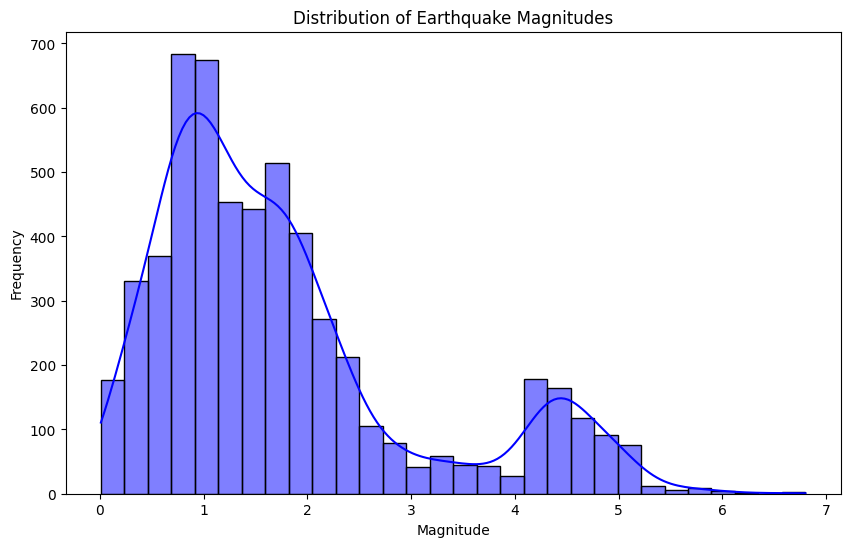

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(earthquake_df['mag'], kde=True, bins=30, color='blue')
plt.title('Distribution of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

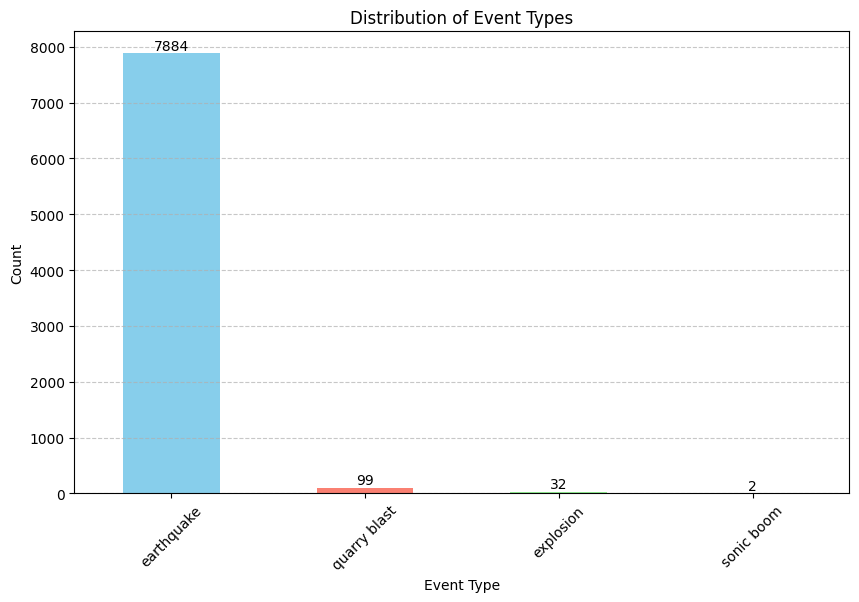

In [ ]:
type_counts = df['type'].value_counts()
plt.figure(figsize=(10, 6))
bars = type_counts.plot(kind='bar', color=['skyblue', 'salmon', 'lightgreen'])

# Annotate each bar with the count
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 10,
        int(bar.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.title('Distribution of Event Types')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

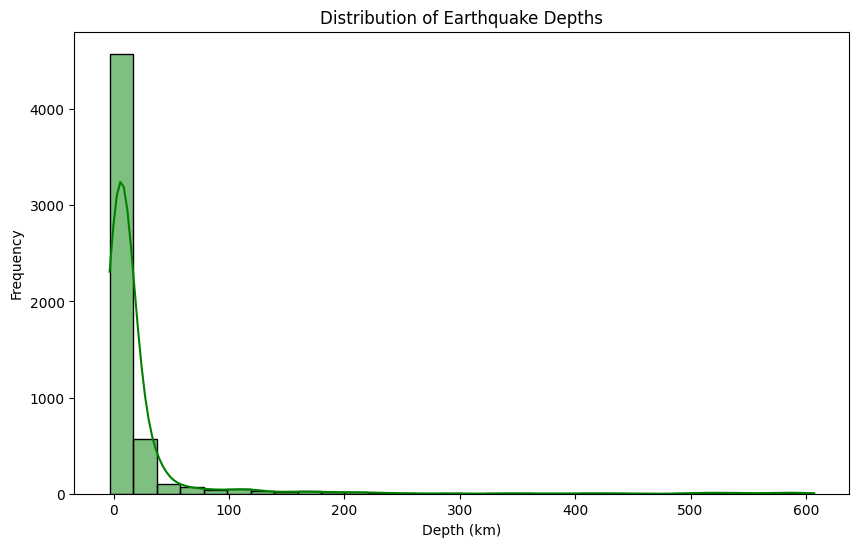

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(earthquake_df['depth'], kde=True, bins=30, color='green')
plt.title('Distribution of Earthquake Depths')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

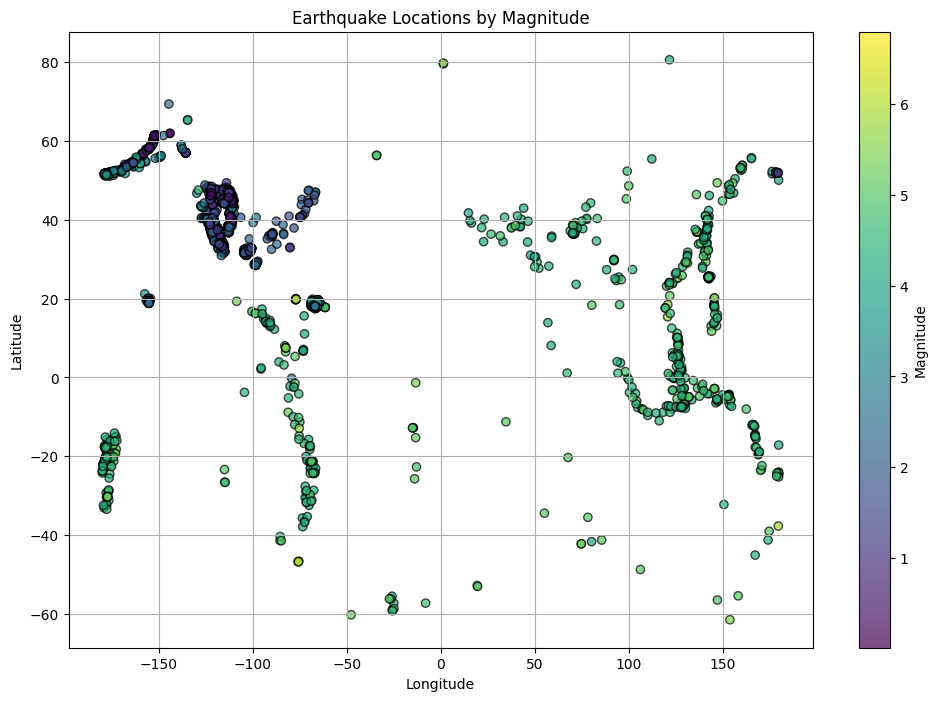

In [ ]:
plt.figure(figsize=(12, 8))
plt.scatter(earthquake_df['longitude'], earthquake_df['latitude'], c=earthquake_df['mag'], cmap='viridis', alpha=0.7, edgecolor='k')
plt.colorbar(label='Magnitude')
plt.title('Earthquake Locations by Magnitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


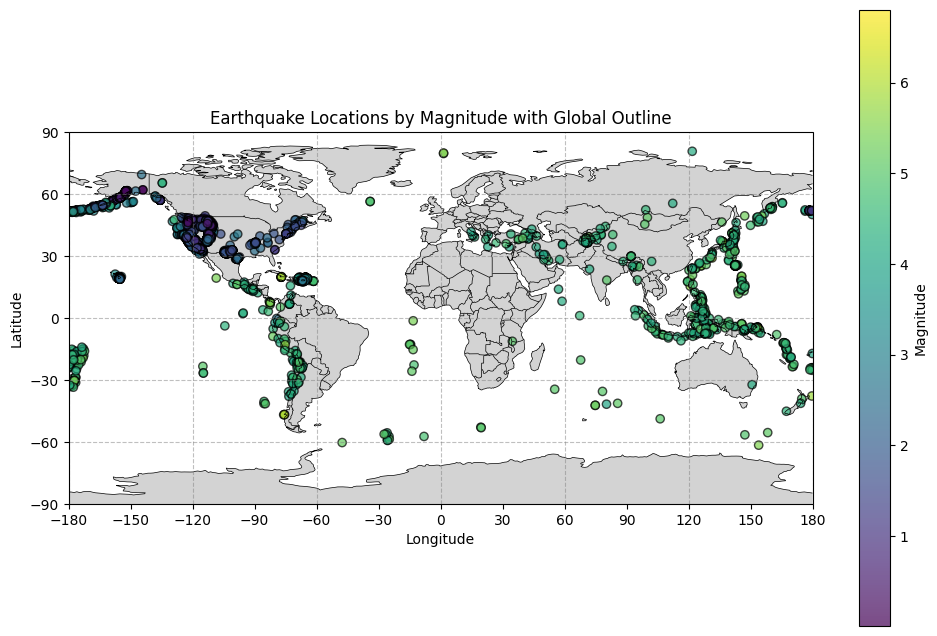

In [ ]:
# Create a global map with Cartopy
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add map features for global outline
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')

# Scatter plot of earthquake locations
scatter = ax.scatter(
    earthquake_df['longitude'],
    earthquake_df['latitude'],
    c=earthquake_df['mag'],
    cmap='viridis',
    alpha=0.7,
    edgecolor='k',
    transform=ccrs.PlateCarree()
)

# Set longitude and latitude ticks manually with positive and negative values
ax.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=10)  # Adjust tick label size for better readability

# Add gridlines without labels
ax.gridlines(draw_labels=False, color='gray', alpha=0.5, linestyle='--')

# Add colorbar and labels
plt.colorbar(scatter, label='Magnitude', orientation='vertical', pad=0.05)
plt.title('Earthquake Locations by Magnitude with Global Outline')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

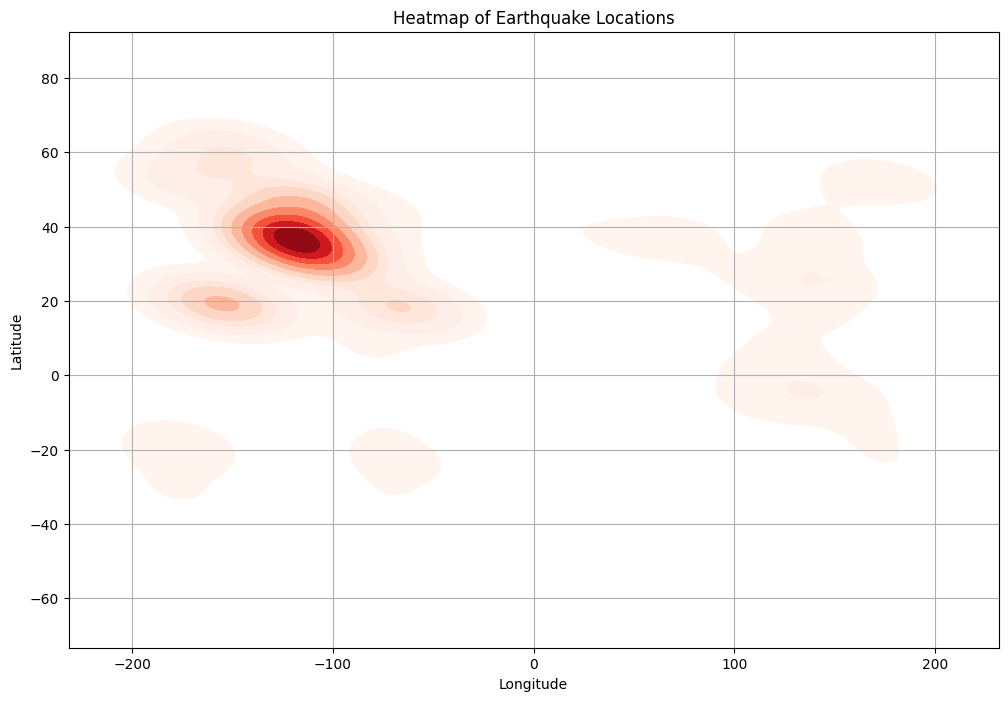

In [ ]:

plt.figure(figsize=(12, 8))
sns.kdeplot(x=earthquake_df['longitude'], y=earthquake_df['latitude'], cmap='Reds', fill=True)
plt.title('Heatmap of Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

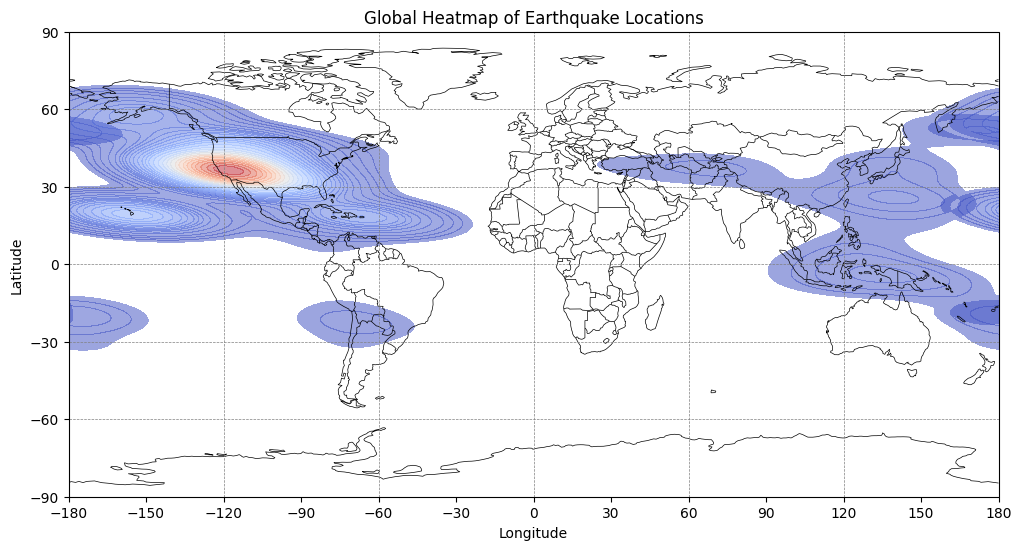

In [ ]:
# Create a figure with Cartopy
fig = plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Add global outline features
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)

# Plot the heatmap using seaborn with an updated colormap
sns.kdeplot(
    x=earthquake_df['longitude'],
    y=earthquake_df['latitude'],
    cmap='coolwarm',  # Updated colormap
    fill=True,
    alpha=0.5,
    levels=30
)

# Add gridlines without labels (rely on set_xticks and set_yticks for axis labels)
ax.gridlines(draw_labels=False, color='gray', linestyle='--', linewidth=0.5)

# Set longitude and latitude ticks manually
ax.set_xticks(range(-180, 181, 30), crs=ccrs.PlateCarree())  # Longitude ticks
ax.set_yticks(range(-90, 91, 30), crs=ccrs.PlateCarree())    # Latitude ticks

# Add title and labels
plt.title('Global Heatmap of Earthquake Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

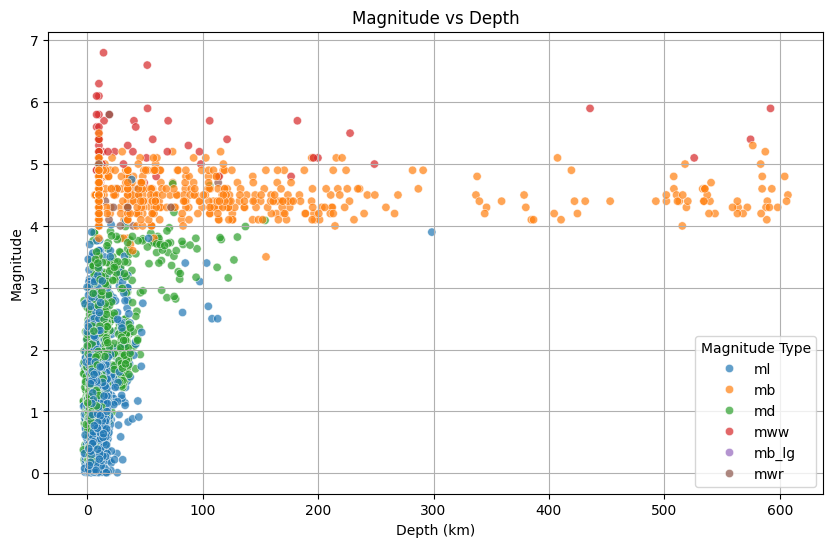

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=earthquake_df, x='depth', y='mag', hue='magType', palette='tab10', alpha=0.7)
plt.title('Magnitude vs Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.legend(title='Magnitude Type')
plt.grid()
plt.show()

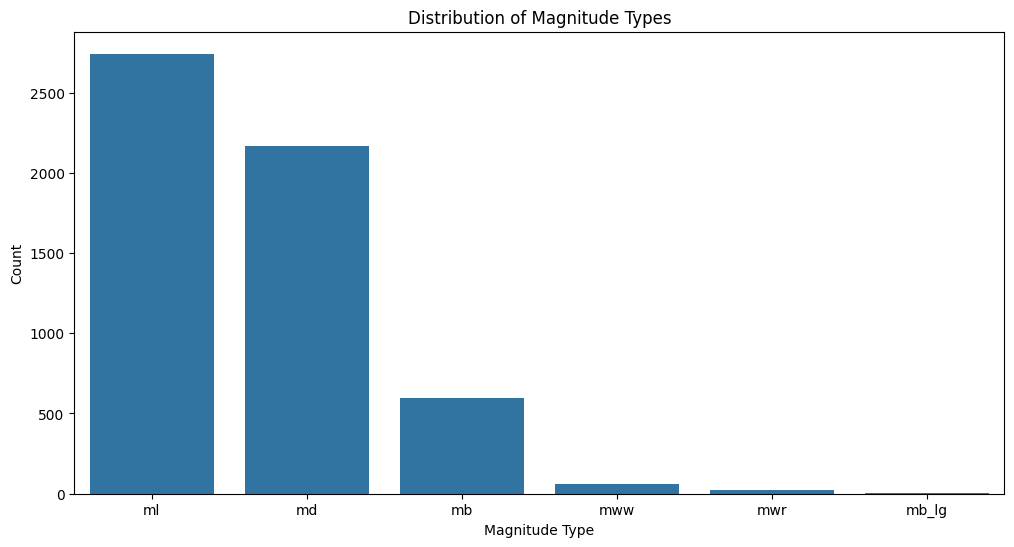

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=earthquake_df, x='magType', order=earthquake_df['magType'].value_counts().index)
plt.title('Distribution of Magnitude Types')
plt.xlabel('Magnitude Type')
plt.ylabel('Count')
plt.show()

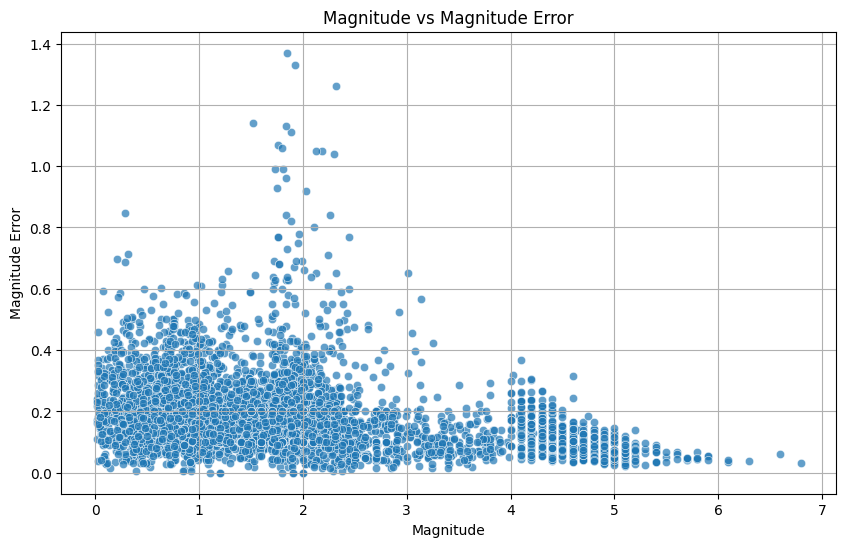

In [ ]:
# Visualization for Magnitude vs Magnitude Error without 'magType'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=earthquake_df, x='mag', y='magError', alpha=0.7)
plt.title('Magnitude vs Magnitude Error')
plt.xlabel('Magnitude')
plt.ylabel('Magnitude Error')
plt.grid()
plt.show()


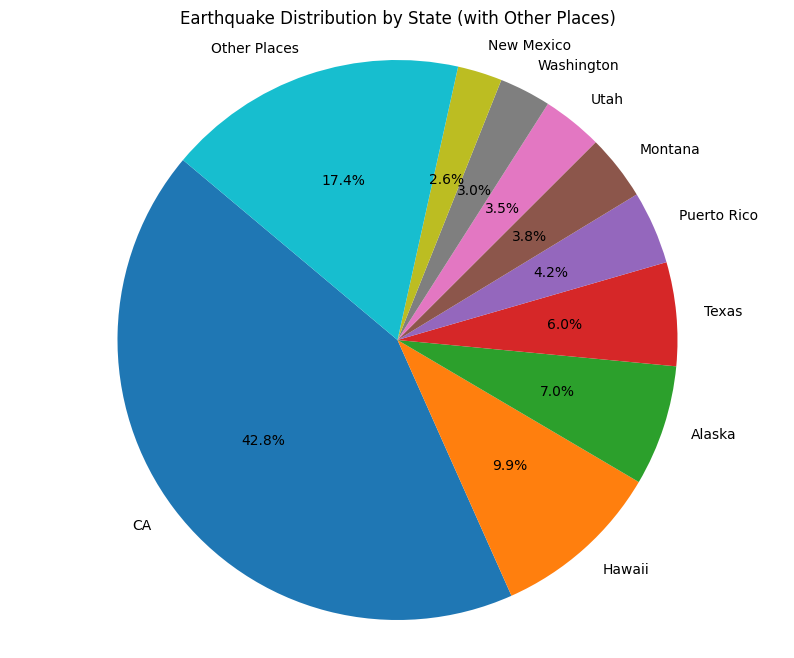

In [ ]:
# Extract states from the 'place' column directly and create a pie chart with "Other States"
if 'place' in earthquake_df.columns:
    # Extract the state name without creating a new column
    states = earthquake_df['place'].str.split(',').str[-1].str.strip()

    # Count the occurrences of each unique state
    state_counts = states.value_counts()

    # Calculate percentage for each state
    total = state_counts.sum()
    state_percentages = (state_counts / total) * 100

    # Combine states below 1.7% into "Other States"
    state_counts_adjusted = state_counts[state_percentages >= 1.7]
    state_counts_adjusted['Other Places'] = state_counts[state_percentages < 1.7].sum()

    # Plot a pie chart
    plt.figure(figsize=(10, 8))
    plt.pie(
        state_counts_adjusted.values,
        labels=state_counts_adjusted.index,
        autopct='%1.1f%%',
        startangle=140
    )
    plt.title('Earthquake Distribution by State (with Other Places)')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()
else:
    print("The column 'place' does not exist in the dataset.")

# FEATURE SELECTION

In [ ]:
numerical_cols = earthquake_df.select_dtypes(include=['float64', 'int64'])

correlation_matrix = numerical_cols.corr()

mag_correlations = correlation_matrix['mag'].sort_values(ascending=False)

print(mag_correlations)

mag                1.000000
rms                0.802922
horizontalError    0.774438
longitude          0.616757
nst                0.486953
dmin               0.482616
depth              0.457147
magNst             0.404020
depthError         0.353378
gap                0.073475
magError          -0.261805
latitude          -0.658034
Name: mag, dtype: float64


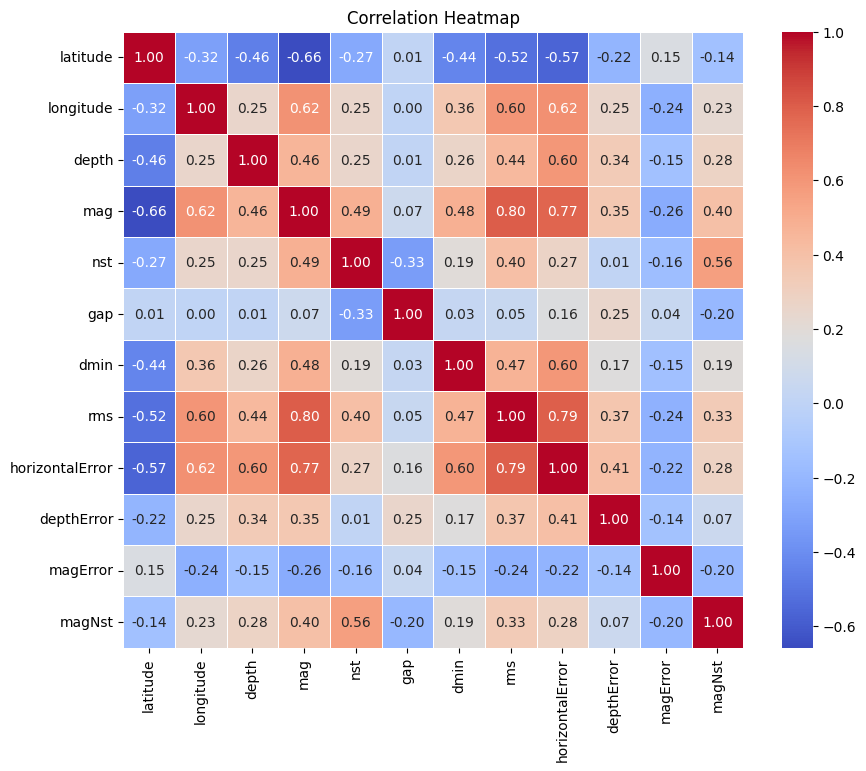

In [ ]:
#Finding corelation among features
numeric_columns = ['latitude', 'longitude', 'depth', 'mag', 'nst', 'gap', 'dmin', 'rms',
                   'horizontalError', 'depthError', 'magError', 'magNst']

# Calculate the correlation matrix
correlation_matrix = earthquake_df[numeric_columns].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title("Correlation Heatmap")
plt.show()


# FEATURE TRANSFORMATION

In [ ]:
encoded_df = pd.get_dummies(earthquake_df, columns=['magType'], drop_first=False)

In [ ]:
encoded_df

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms,id,...,magError,magNst,status,magSource,magType_mb,magType_mb_lg,magType_md,magType_ml,magType_mwr,magType_mww
1,2024-12-04T02:02:39.770Z,36.186000,-118.053833,1.800,0.87,21.0,60.0,0.174900,0.19,ci40993200,...,0.162000,9.0,automatic,ci,False,False,False,True,False,False
2,2024-12-04T01:56:57.937Z,18.341800,80.445100,10.000,5.00,63.0,52.0,9.886000,0.79,us7000nvs3,...,0.064000,77.0,reviewed,us,True,False,False,False,False,False
4,2024-12-04T01:26:23.220Z,35.922667,-117.676000,3.180,1.13,28.0,46.0,0.032650,0.13,ci40993192,...,0.138000,18.0,automatic,ci,False,False,False,True,False,False
5,2024-12-04T01:17:42.370Z,19.328833,-155.191666,3.330,1.78,45.0,110.0,0.050060,0.21,hv74555137,...,0.290000,24.0,automatic,hv,False,False,True,False,False,False
6,2024-12-04T01:16:09.180Z,38.831665,-122.807503,2.550,0.44,8.0,98.0,0.008499,0.04,nc75094726,...,0.220000,8.0,automatic,nc,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8006,2024-11-04T03:26:05.370Z,-8.857100,110.222100,100.629,4.50,20.0,132.0,1.809000,0.42,us7000npsx,...,0.181000,9.0,reviewed,us,True,False,False,False,False,False
8008,2024-11-04T02:58:35.262Z,-41.285700,174.261900,35.000,4.30,33.0,73.0,0.669000,0.95,us7000npst,...,0.054000,33.0,reviewed,us,False,False,False,False,True,False
8010,2024-11-04T02:48:26.560Z,38.788000,-122.748500,0.330,1.14,18.0,71.0,0.041650,0.05,nc75082636,...,0.190000,16.0,reviewed,nc,False,False,True,False,False,False
8015,2024-11-04T02:39:10.750Z,61.315500,-152.285500,1.710,0.13,10.0,124.0,0.070400,0.14,av93343813,...,0.220786,10.0,reviewed,av,False,False,False,True,False,False


In [ ]:
y=encoded_df['mag']
X=encoded_df[['dmin','magNst','depth','latitude','longitude','gap', 'magType_mb', 'magType_mb_lg', 'magType_md', 'magType_ml', 'magType_mwr', 'magType_mww']]

In [ ]:
#Spltting Dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
# Normalization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# REGRESSION MODELS

In [ ]:
# Initialize Regression models
models = {
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor(),
    "LightGBM": LGBMRegressor(),
    "Catboost": CatBoostRegressor(),
    "ElasticNet": ElasticNet(),
    "BayesianRidge": BayesianRidge(),
    "MLP": MLPRegressor(max_iter=500)
}

In [ ]:
results = {}

# MODEL BUILDING

In [ ]:
def evaluate_model_cv(model, X_train, y_train, cv=5):
    mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
    r2_scorer = make_scorer(r2_score)
    mse_scores = cross_val_score(model, X_train, y_train, scoring=mse_scorer, cv=5)
    mean_mse = -np.mean(mse_scores)
    r2_scores = cross_val_score(model, X_train, y_train, scoring=r2_scorer, cv=5)
    mean_r2 = np.mean(r2_scores)
    return mean_mse, mean_r2

In [ ]:
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('regressor', model)])
    mean_mse, mean_r2 = evaluate_model_cv(pipeline, X_train, y_train, model)
    results[model_name] = {
        'mean_mse': mean_mse,
        'mean_r2': mean_r2

    }
    joblib.dump(model, f"{model_name}_model.pkl")

Streaming output truncated to the last 5000 lines.
4:	learn: 1.0325034	total: 11ms	remaining: 2.18s
5:	learn: 0.9951123	total: 13.2ms	remaining: 2.18s
6:	learn: 0.9618266	total: 15.4ms	remaining: 2.18s
7:	learn: 0.9260679	total: 17.7ms	remaining: 2.19s
8:	learn: 0.8950483	total: 19.9ms	remaining: 2.19s
9:	learn: 0.8647183	total: 22.1ms	remaining: 2.19s
10:	learn: 0.8366414	total: 24.3ms	remaining: 2.19s
11:	learn: 0.8079327	total: 26.6ms	remaining: 2.19s
12:	learn: 0.7828471	total: 28.7ms	remaining: 2.17s
13:	learn: 0.7581845	total: 30.9ms	remaining: 2.17s
14:	learn: 0.7361766	total: 33ms	remaining: 2.16s
15:	learn: 0.7146074	total: 35.1ms	remaining: 2.16s
16:	learn: 0.6941568	total: 37.3ms	remaining: 2.16s
17:	learn: 0.6748003	total: 39.4ms	remaining: 2.15s
18:	learn: 0.6567003	total: 41.5ms	remaining: 2.14s
19:	learn: 0.6385218	total: 43.7ms	remaining: 2.14s
20:	learn: 0.6211403	total: 45.8ms	remaining: 2.13s
21:	learn: 0.6056549	total: 48ms	remaining: 2.13s
22:	learn: 0.5917374	tota

In [ ]:
sorted_results = sorted(results.items(), key=lambda x: x[1]['mean_mse'])

In [ ]:
results_df = pd.DataFrame([{"Model": model_name,"Mean Squared Error": metrics['mean_mse'],
                            "Mean R2": metrics['mean_r2']}for model_name, metrics in results.items()])
results_df = results_df.sort_values(by="Mean Squared Error")

In [ ]:
results_df['Root Mean Squared Error'] = np.sqrt(results_df['Mean Squared Error'])
results_df.reset_index(drop=True,inplace=True)
results_df

,Model,Mean Squared Error,Mean R2,Root Mean Squared Error
0,Catboost,0.099837,0.937983,0.315970
1,LightGBM,0.107336,0.933334,0.327621
2,Random Forest,0.107500,0.933622,0.327872
3,XGBoost,0.113049,0.929736,0.336227
4,Gradient Boosting,0.129022,0.919853,0.359196
5,MLP,0.146593,0.906750,0.382875
6,Support Vector Regression,0.172520,0.892751,0.415355
7,BayesianRidge,0.371367,0.769165,0.609399
8,Ridge,0.371371,0.769161,0.609402
9,ElasticNet,1.013243,0.371847,1.006600


# STACKING ENSEMBLE LEARNING METHOD

In [ ]:
stacking_model = StackingRegressor(
    estimators=[
        ('catboost', CatBoostRegressor(verbose=0)),
        ('lightgbm', LGBMRegressor()),
        ('rf', RandomForestRegressor())
    ]
)

In [ ]:
mse_scorer = make_scorer(mean_squared_error, greater_is_better=False)
r2_scorer = make_scorer(r2_score)

In [ ]:
pipeline = Pipeline(steps=[('stacking', stacking_model)])
pipeline.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000271 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1393
[LightGBM] [Info] Number of data points in the train set: 4478, number of used features: 10
[LightGBM] [Info] Start training from score 1.738736
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000377 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1382
[LightGBM] [Info] Number of data points in the train set: 3582, number of used features: 10
[LightGBM] [Info] Start training from score 1.725087
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins

Pipeline(steps=[('stacking',
                 StackingRegressor(estimators=[('catboost',
                                                <catboost.core.CatBoostRegressor object at 0x7f8af04f8550>),
                                               ('lightgbm', LGBMRegressor()),
                                               ('rf',
                                                RandomForestRegressor())]))])

In [ ]:
# Perform cross-validation to get the mean MSE
mse_scores = cross_val_score(pipeline, X_train, y_train, scoring=mse_scorer, cv=5)
mean_mse = -np.mean(mse_scores)  # Convert back to positive MSE

# Perform cross-validation for R²
r2_scores = cross_val_score(pipeline, X_train, y_train, scoring=r2_scorer, cv=5)
mean_r2 = np.mean(r2_scores)
print(f"Stacking Regressor - Mean Cross-Validated MSE: {mean_mse:.4f}")
print(f"Stacking Regressor - Mean Cross-Validated R²: {mean_r2:.4f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1382
[LightGBM] [Info] Number of data points in the train set: 3582, number of used features: 10
[LightGBM] [Info] Start training from score 1.725087
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 2865, number of used features: 10
[LightGBM] [Info] Start training from score 1.740510
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough,

In [ ]:
results_df

,Model,Mean Squared Error,Mean R2,Root Mean Squared Error
0,Catboost,0.099837,0.937983,0.315970
1,LightGBM,0.107336,0.933334,0.327621
2,Random Forest,0.107500,0.933622,0.327872
3,XGBoost,0.113049,0.929736,0.336227
4,Gradient Boosting,0.129022,0.919853,0.359196
5,MLP,0.146593,0.906750,0.382875
6,Support Vector Regression,0.172520,0.892751,0.415355
7,BayesianRidge,0.371367,0.769165,0.609399
8,Ridge,0.371371,0.769161,0.609402
9,ElasticNet,1.013243,0.371847,1.006600


In [ ]:
results_df.loc[len(results_df)] = ["Ensemble Learning", mean_mse, mean_r2, np.sqrt(mean_mse)]
results_df.sort_values(by='Mean Squared Error', ascending=True).reset_index(drop=True)

,Model,Mean Squared Error,Mean R2,Root Mean Squared Error
0,Ensemble Learning,0.097492,0.939424,0.312236
1,Catboost,0.099837,0.937983,0.315970
2,LightGBM,0.107336,0.933334,0.327621
3,Random Forest,0.107500,0.933622,0.327872
4,XGBoost,0.113049,0.929736,0.336227
5,Gradient Boosting,0.129022,0.919853,0.359196
6,MLP,0.146593,0.906750,0.382875
7,Support Vector Regression,0.172520,0.892751,0.415355
8,BayesianRidge,0.371367,0.769165,0.609399
9,Ridge,0.371371,0.769161,0.609402


In [ ]:
results_df.sort_values(by='Mean Squared Error', ascending=True, inplace=True)
results_df.reset_index(drop=True, inplace=True)

In [ ]:
results_df

,Model,Mean Squared Error,Mean R2,Root Mean Squared Error
0,Ensemble Learning,0.097492,0.939424,0.312236
1,Catboost,0.099837,0.937983,0.315970
2,LightGBM,0.107336,0.933334,0.327621
3,Random Forest,0.107500,0.933622,0.327872
4,XGBoost,0.113049,0.929736,0.336227
5,Gradient Boosting,0.129022,0.919853,0.359196
6,MLP,0.146593,0.906750,0.382875
7,Support Vector Regression,0.172520,0.892751,0.415355
8,BayesianRidge,0.371367,0.769165,0.609399
9,Ridge,0.371371,0.769161,0.609402


In [ ]:
joblib.dump(pipeline, "stacking_model.pkl")

['stacking_model.pkl']

In [ ]:
def calculate_nrmse(mse, targets):
    rmse = np.sqrt(mse)
    target_range = targets.max() - targets.min()
    nrmse = (rmse / target_range) * 100
    return nrmse

results_df['NRMSE (%)'] = results_df['Mean Squared Error'].apply(lambda x: round(calculate_nrmse(x, earthquake_df['mag']), 2))
results_df

,Model,Mean Squared Error,Mean R2,Root Mean Squared Error,NRMSE (%)
0,Ensemble Learning,0.097492,0.939424,0.312236,4.60
1,Catboost,0.099837,0.937983,0.315970,4.65
2,LightGBM,0.107336,0.933334,0.327621,4.83
3,Random Forest,0.107500,0.933622,0.327872,4.83
4,XGBoost,0.113049,0.929736,0.336227,4.95
5,Gradient Boosting,0.129022,0.919853,0.359196,5.29
6,MLP,0.146593,0.906750,0.382875,5.64
7,Support Vector Regression,0.172520,0.892751,0.415355,6.12
8,BayesianRidge,0.371367,0.769165,0.609399,8.97
9,Ridge,0.371371,0.769161,0.609402,8.97


In [ ]:
results_df.to_csv('evaluation.csv') #saving evaluation metrics to csv

# ERROR VISUALIZATION

In [ ]:
metrics = ['Mean Squared Error', 'Mean R2', 'Root Mean Squared Error', 'NRMSE (%)']

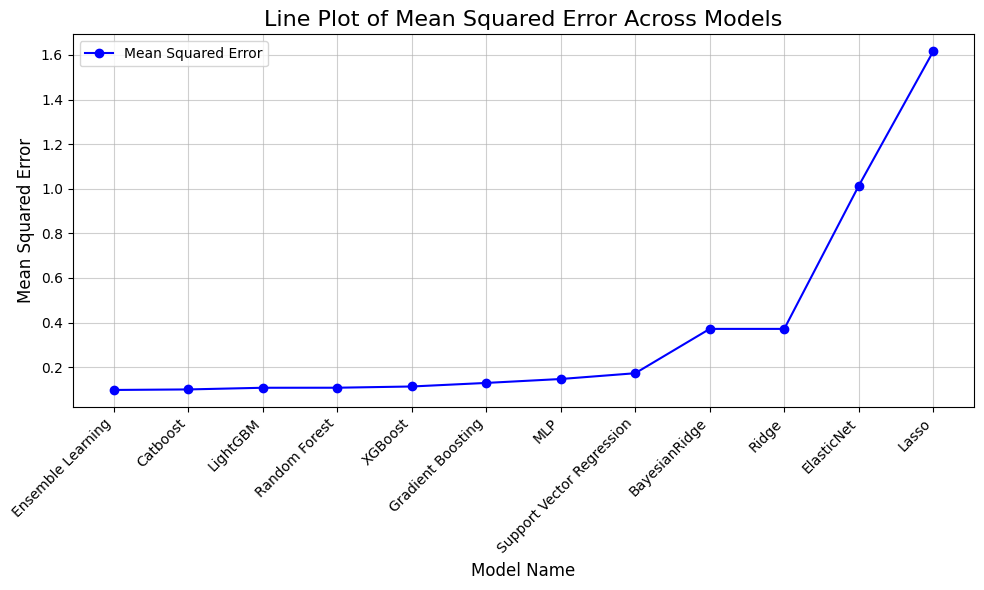

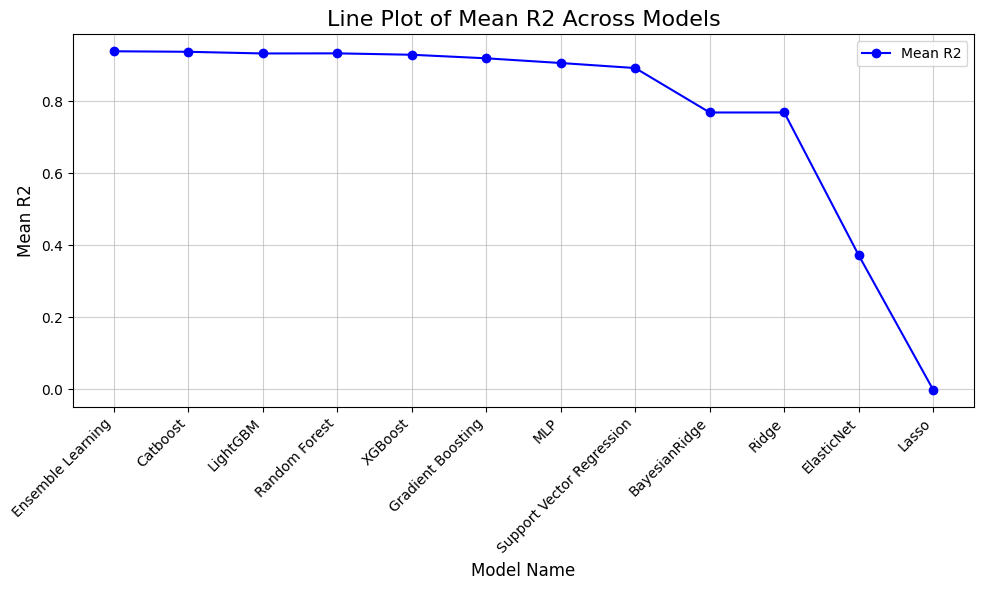

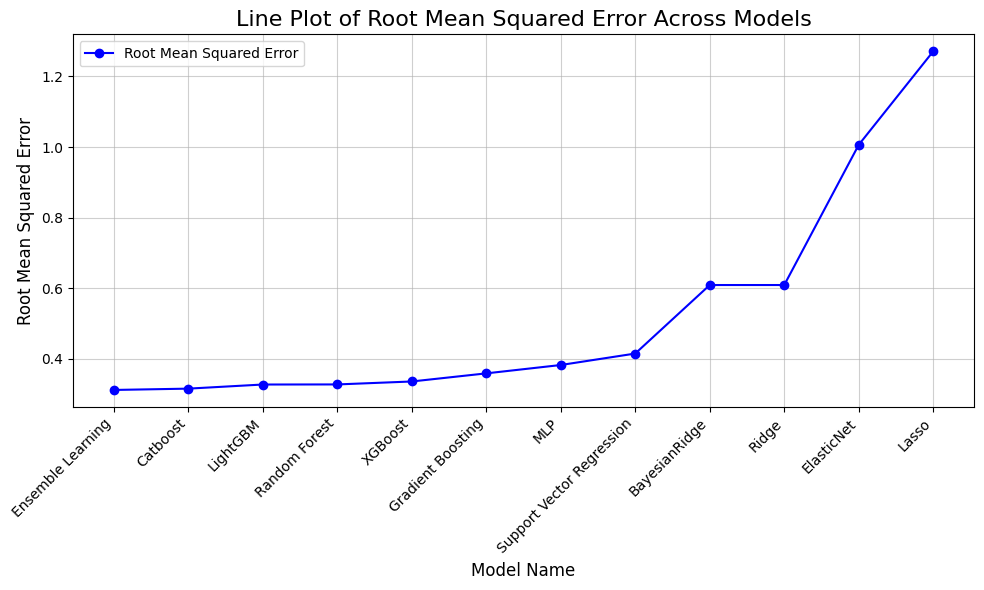

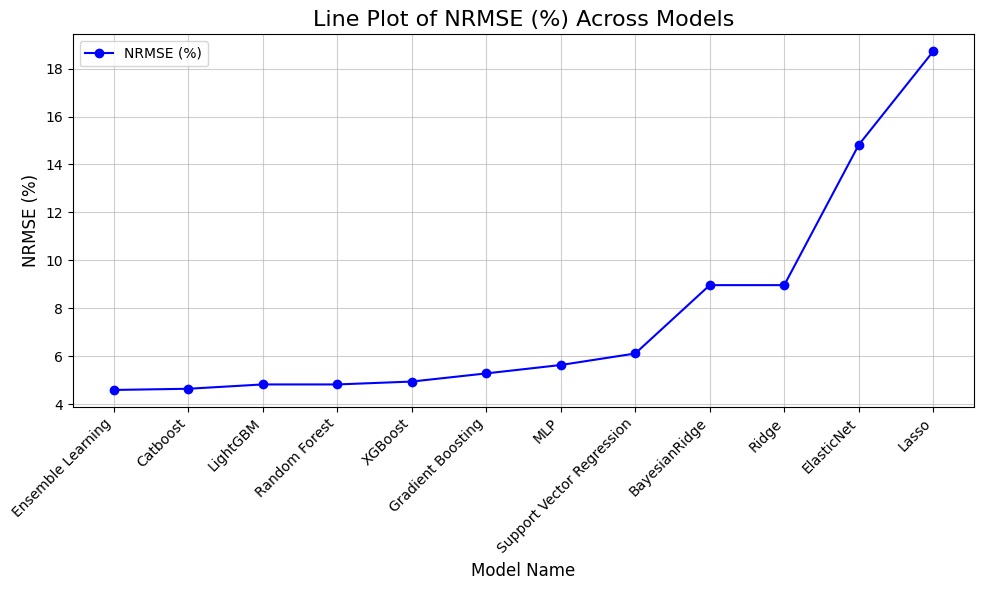

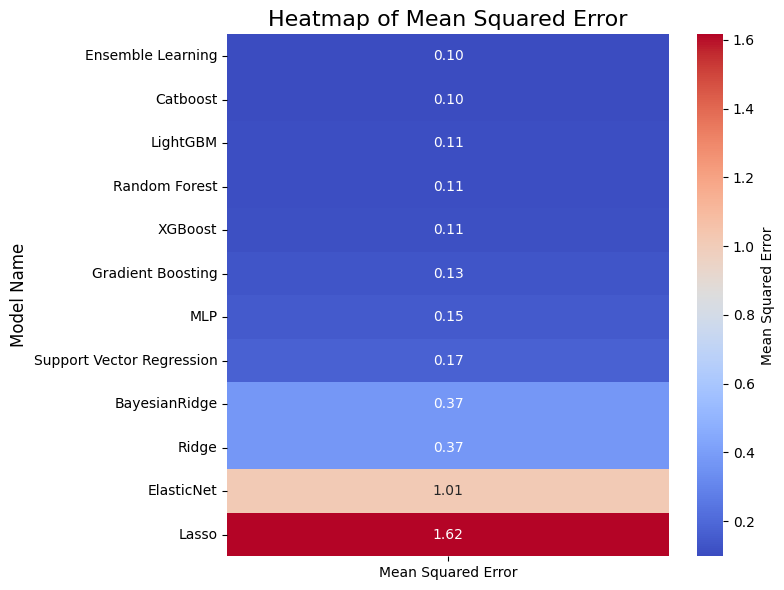

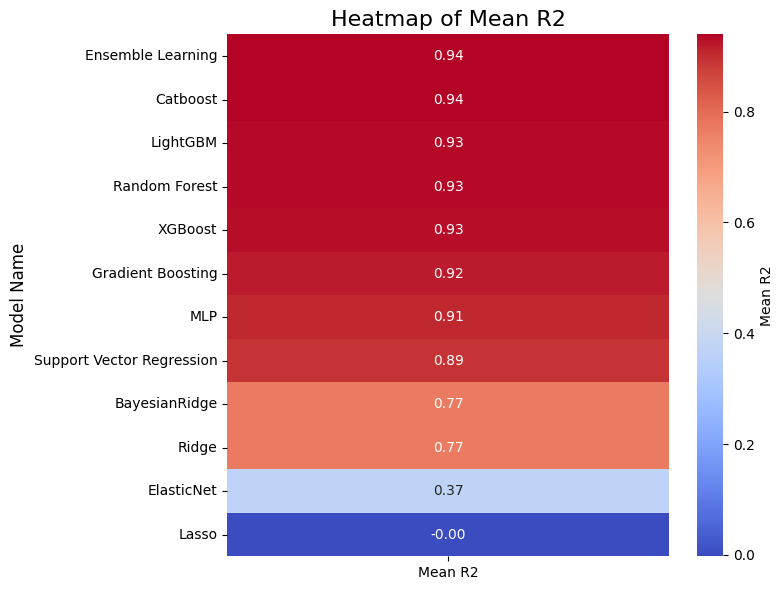

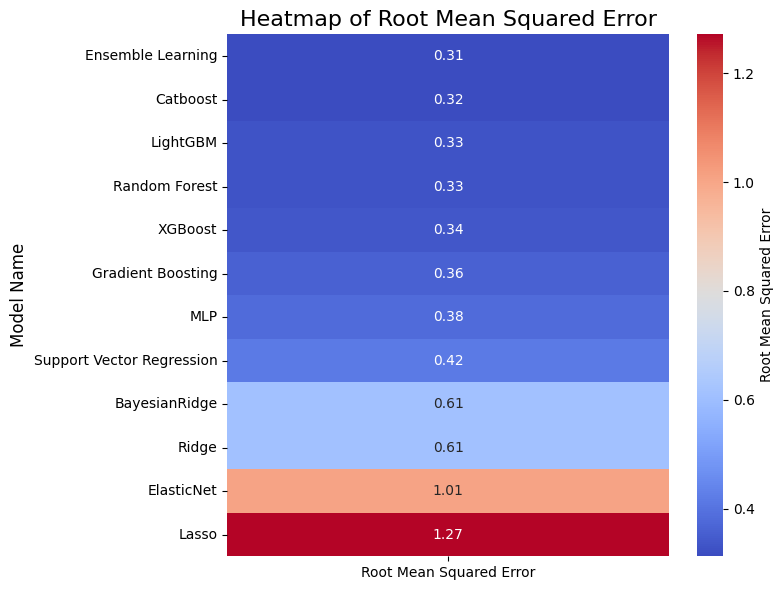

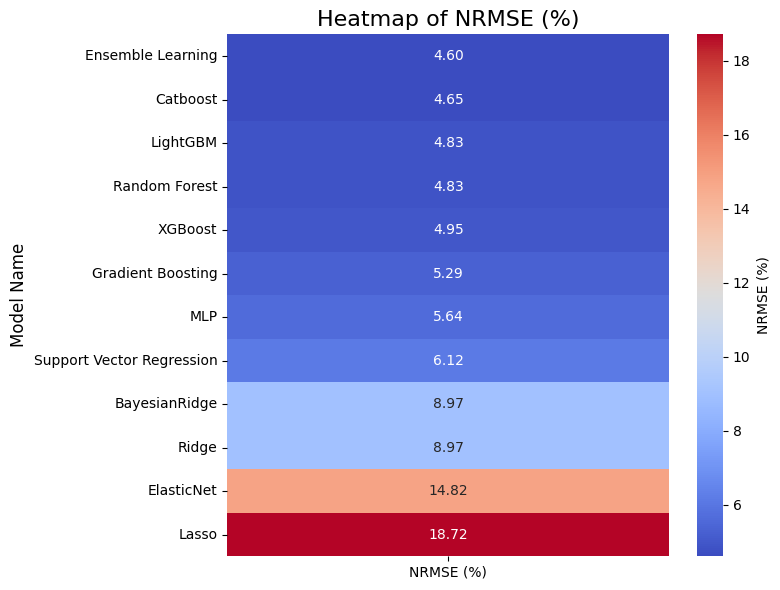

In [ ]:
for metric in metrics:
    plt.figure(figsize=(10, 6))
    plt.plot(results_df['Model'], results_df[metric], marker='o', label=metric, color='blue')
    plt.title(f"Line Plot of {metric} Across Models", fontsize=16)
    plt.xlabel("Model Name", fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(alpha=0.6)
    plt.tight_layout()
    plt.legend()
    plt.show()

# Heatmap for each metric separately
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.heatmap(results_df[[metric]].set_index(results_df['Model']), annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': metric})
    plt.title(f"Heatmap of {metric}", fontsize=16)
    plt.ylabel("Model Name", fontsize=12)
    plt.tight_layout()
    plt.show()

#PREDICTION

In [ ]:
model = joblib.load('/content/data/stacking_model.pkl')

In [ ]:
X_new=[[2,14,6.84,36.6453,-121.25,155,0,0,0,1,0,0]] #original mag value:3

In [ ]:
predictions = model.predict(X_new)
predictions

array([3.31193038])